<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;"><font size=4 color=blue><b>[23차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
○ OCR 방법에 대해 이해할 수 있다<br><br>
○ Tessaract를 이용하여 문자를 인식할 수 있다<br><br>
○ EasyOCR 이용한 문자를 인식할 수 있다<br><br>        
○ 기타 OCR 라이브러리를 사용하여 문자을 인식할 수 있다     
        </font></td></tr>   
</table>

# OCR

- 참고 : https://meissa.tistory.com/80?category=962022

## 개념 

- OCR  =Text detection + Text recognition

<img src="./lecture_image/23_ocr01.png" width=70%>

  - Text detection : Object detection의 문자 찾아내기 확장 버전(Segmentation 및 문자특성 고려)
    - 이미지 내에서 문자를 검출해낼 때엔 검출하기 위한 최소 단위를 설정
    - 단어 단위의 탐지 : Object detection의 Regression기반의 Detection방법
      - Anchor를 정의하고 단어의 유무, Bounding box의 크기를 추정해서 단어를 찾음
      - (예) TextBoxes 방법
    - 글자 단위의 방식 : 글자인 영역을 Segmentation하는 방법으로 접근
      - (예) PixelLink 방법
    - 두 가지 방법을 모두 활용한 방법이 있음
      - CRAFT : Character 단위로 문자의 위치를 찾아낸 뒤 이를 연결하는 방식을 Segmentation기반으로 구현한 방법
      
      - PMTD(Pyramid Mask Text Detector) : Mask-RCNN으로 Text영역 검출 → 단어의 사각형 배치 특성을 반영한 피라미드 형태의 Score map을 활용하여 기존의 부정확한 Mask 영역을 보완
        - Mask-RCNN의 경우 단어 영역이 Box head에 의해 빨간색으로 잡히면 우측 처럼 boundary를 모두 Text 영역으로 잡지만, PMTD는 이를 보완하여 전체 Text 영역을 검출
        
<img src="./lecture_image/23_ocr03.png" width=60%> 

  - Text recognition : 검출된 영역의 문자가 무엇인지를 인식해 내는 과정
    - Unsegmented Data : 분리에 드는 비용이 비싸거나 어려워 Segmentation이 되어있지 않은 데이터
      - 특징 : segment되어 있지 않은 하위데이터들끼리 시퀀스(sequence)를 이루고 있다는 점
    - CRNN : CNN으로 문자의 특성을 검출하고 Map-To-Sequence로 변환한 후에 Bidirectional LSTM으로 문자를 인식하는 방법

## Tessaract 
- 1980년대 최초로 개발된 OCR 알고리즘 중 하나


- 다운로드 : https://github.com/UB-Mannheim/tesseract/wiki


- tesseract-ocr-w64-setup-v5.0.0-alpha.20201127.exe 파일 다운로드 및 설치

- Additional language data 체크

In [1]:
!pip install pytesseract

In [3]:
!pip install opencv

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [2]:
import pytesseract

# 설치 폴더 설정
pytesseract.pytesseract.tesseract_cmd =r"C:/Program Files/Tesseract-OCR/tesseract.exe"

ModuleNotFoundError: No module named 'pytesseract'

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./image/text.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")

ModuleNotFoundError: No module named 'cv2'

In [6]:
text = pytesseract.image_to_string(img, lang='eng')
print(text)

Life is a journey,
not a guided tour.

- Anonymous -



### 한글 이미지 인식

(-0.5, 502.5, 412.5, -0.5)

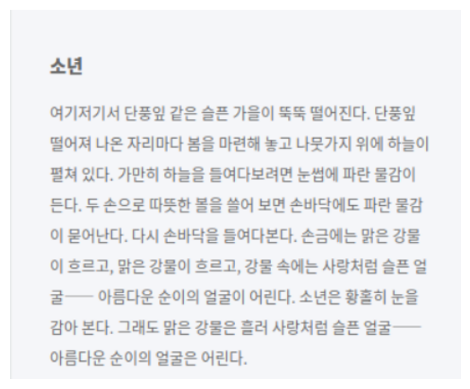

In [8]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./image/story.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")

In [10]:
text = pytesseract.image_to_string(img, lang='Kor')
print(text)

소년

여기저기서 단풍잎 같은 슬픈 가을이 뚝뚝 떨어진다. 단풍잎
떨어져 나온 자리마다 봄을 마련해 놓고 나못가지 위에 하늘이
펼쳐 있다. 가만히 하늘을 들여다보려면 눈썸에 파란 물감이
든다. 두 손으로 따뜻한 볼을 쓸어 보면 손바닥에도 파란 물감
이 묻어난다. 다시 손바닥을 들여다본다. 손금에는 맑은 강물
이 흐르고, 맑은 강물이 흐르고, 강물 속에는 사랑처럼 슬픈 얼
굴ㅡ- 아름다운 순이의 얼굴이 어린다. 소년은 황홀히 눈을
감아 본다. 그래도 맑은 강물은 흘러 사랑처럼 슬픈 얼굴--
아름다운 순이의 얼굴은 어린다.



### 포스터 한글 이미지 인식

(-0.5, 221.5, 299.5, -0.5)

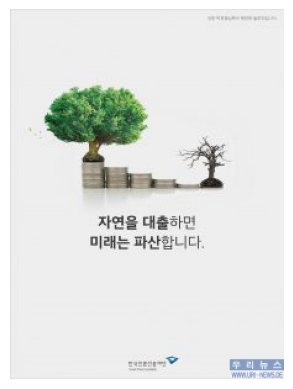

In [11]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./image/nature.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")

In [13]:
text = pytesseract.image_to_string(img, lang='Kor')
print(text)

자연을 대출하면
미래는 파산합니다




### 번호판 인식

(-0.5, 702.5, 173.5, -0.5)

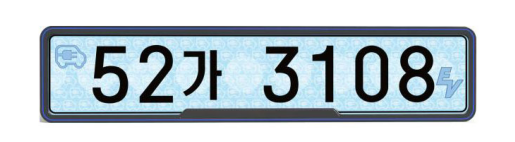

In [14]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./image/car.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")

In [15]:
text = pytesseract.image_to_string(img, lang='Kor')
print(text)

- tessract는 이진 이미지로 변환해서 인식을 하면 성능을 높일 수 있다.

(-0.5, 702.5, 173.5, -0.5)

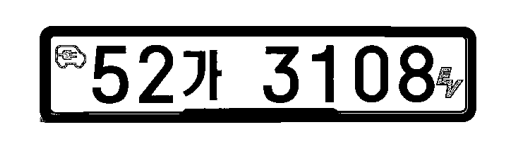

In [23]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, img_th = cv2.threshold(img_gray, 183, 255, cv2.THRESH_BINARY)

plt.imshow(img_th, cmap='gray')
plt.axis('off')

In [24]:
text = pytesseract.image_to_string(img_th, lang='Kor')
print(text)

“52가 31089



## EasyOCR
- 문자영역 인식, 문자 인식을 쉽게 할 수 있게 하는 파이썬 라이브러리
- 간단하고 직관적
- 80개 이상의 언어를 지원
- 문자 추출은 CRAFT를 문자 인식은 CRNN을 사용


- 수행 결과로 텍스트의 바운딩 박스 좌표와 읽은 문자를 반환


- 참고 : https://github.com/JaidedAI/EasyOCR

In [26]:
#!pip uninstall opencv-python
!pip install opencv-python==4.5.4.60 easyocr --user

  Using cached easyocr-1.6.2-py3-none-any.whl (2.9 MB)
  Using cached scikit_image-0.19.3-cp37-cp37m-win_amd64.whl (12.1 MB)
  Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


(-0.5, 702.5, 173.5, -0.5)

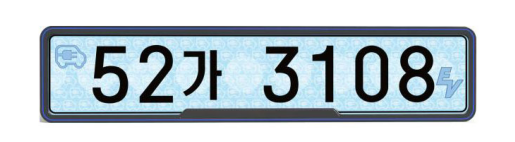

In [29]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./image/car.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")

In [30]:
import easyocr

#인식할 언어 설정
reader = easyocr.Reader(['ko', 'en'])
#글씨 영역, 인식된 글씨
result = reader.readtext(img)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[107, 37], [311, 37], [311, 145], [107, 145]], '52가', 0.7567805647850037),
 ([[350, 40], [614, 40], [614, 144], [350, 144]], '3108', 0.9909147620201111)]

## PaddleOCR

- 참고 
  - https://learnopencv.com/optical-character-recognition-using-paddleocr/?ck_subscriber_id=1390420859
  - https://github.com/PaddlePaddle/PaddleOCR


- 텍스트 감지, 텍스트 방향 분류기 및 텍스트 인식을 제공
- PP-OCR 및 SRN, NRTR 등과 같은 최신 알고리즘을 포함하여 툴킷에 다양한 모델을 제공
- 80 개 이상의 언어를 지원


<img src="./lecture_image/23_paddleocr1.png" width=80%> 

- 설치

In [ ]:
!conda create -ㅜ paddleocr python==3.7

In [ ]:
!activate paddleocr

In [33]:
!git clone https://gitee.com/paddlepaddle/PaddleOCR.git

^C


In [32]:
!pip install -r ./PaddleOCR/requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: './PaddleOCR/requirements.txt'


In [31]:
# !pip install paddlepaddle-gpu paddleocr --user
!pip install paddlepaddle paddleocr --user

     ---------------------------------------- 64.3/64.3 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 389.4/389.4 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 40.6/40.6 kB ? eta 0:00:00
     -------------------------------------- 105.6/105.6 kB 6.0 MB/s eta 0:00:00
     -------------------------------------- 912.8/912.8 kB 3.0 MB/s eta 0:00:00
     -------------------------------------- 986.3/986.3 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 4.9/4.9 MB 2.8 MB/s eta 0:00:00
     -------------------------------------- 242.1/242.1 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 2.9 MB/s eta 0:00:00
     -------------------------------------- 948.0/948.0 kB 2.6 MB/s eta 0:00:00
     -------------------------------------- 399.7/399.7 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 62.4/62.4 kB 3.3 MB/s eta 0:00:00
     -------------------------------------- 204.6/2

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


- 라이브러리 및 학습된 모델 로딩

In [18]:
from paddleocr import PaddleOCR, draw_ocr
import os
import cv2
import matplotlib.pyplot as plt

ocr = PaddleOCR(use_anle_cls = True, lang='korean')
ocr2 = PaddleOCR(use_anle_cls = True, lang='en')

[2022/09/23 15:55:37] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\AI/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\AI/.paddleocr/whl\\det\\ml\\Multilingual_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_mo

- 인식

In [15]:
# 출력함수
def result_ocr(img_path, result, font):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    print(result)
    # result에서 텍스트 위치, 내용, 정확도를 가져와서 저장
    boxes = [line[0] for line in result]
    txts = [line[1][0] for line in result]
    conf = [line[1][1] for line in result]
    
    # ocr 결과 출력함수를 이용해서 출력
    im_show = draw_ocr(image, boxes, txts, conf, font_path=font)
    
    
    plt.figure(figsize=(12,12))
    plt.imshow(im_show)
    plt.axis('off')

- 영수증 인식

[2022/09/23 15:32:45] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/09/23 15:32:45] ppocr DEBUG: dt_boxes num : 66, elapse : 0.5103573799133301
[2022/09/23 15:32:51] ppocr DEBUG: rec_res num  : 66, elapse : 6.167578935623169
[[[[443.0, 41.0], [717.0, 34.0], [719.0, 85.0], [445.0, 93.0]], ("[영수'증>", 0.8533092141151428)], [[[125.0, 92.0], [351.0, 98.0], [350.0, 154.0], [124.0, 149.0]], ('논현돈끼스', 0.9369693994522095)], [[[130.0, 147.0], [402.0, 153.0], [401.0, 205.0], [129.0, 199.0]], ('137-01-77472', 0.8122788071632385)], [[[445.0, 149.0], [579.0, 149.0], [579.0, 201.0], [445.0, 201.0]], ('황영준', 0.7663066983222961)], [[[643.0, 147.0], [678.0, 143.0], [683.0, 192.0], [647.0, 196.0]], ('1', 0.9207482933998108)], [[[693.0, 146.0], [799.0, 146.0], [799.0, 193.0], [693.0, 193.0]], ('032--', 0.8954740762710571)], [[[776.0, 143.0], [862.0, 143.0], [862.0, 191.0], [776.0, 191.0]], ('433', 0.9973495602607727)], 

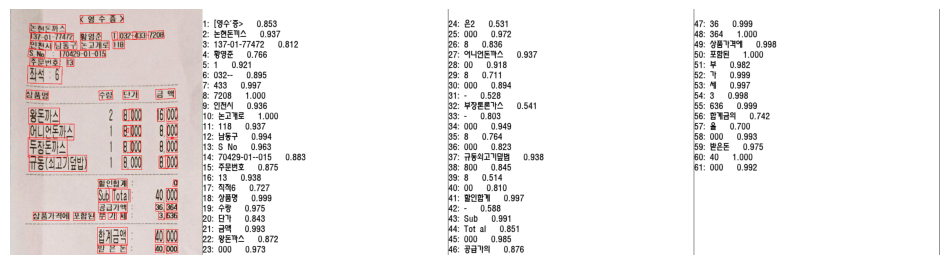

In [10]:
img_path = './image/receipt1.jpg'
result = ocr.ocr(img_path)

font = './image/HMFMMUEX.TTC'

result_ocr(img_path, result, font)

- ID 카드 인식

[2022/09/23 15:42:27] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/09/23 15:42:27] ppocr DEBUG: dt_boxes num : 30, elapse : 0.33812689781188965
[2022/09/23 15:42:30] ppocr DEBUG: rec_res num  : 30, elapse : 3.0545310974121094
[[[[486.0, 216.0], [540.0, 218.0], [539.0, 237.0], [485.0, 235.0]], ('e', 0.5608869194984436)], [[[273.0, 220.0], [368.0, 220.0], [368.0, 238.0], [273.0, 238.0]], ('I lnhld', 0.5940708518028259)], [[[376.0, 219.0], [481.0, 218.0], [481.0, 236.0], [376.0, 237.0]], ('A rrerica', 0.707518458366394)], [[[162.0, 296.0], [215.0, 296.0], [215.0, 317.0], [162.0, 317.0]], ('ms', 0.8512054681777954)], [[[223.0, 296.0], [343.0, 296.0], [343.0, 316.0], [223.0, 316.0]], ('Eurodam', 0.939477801322937)], [[[155.0, 320.0], [198.0, 320.0], [198.0, 342.0], [155.0, 342.0]], ('Sail', 0.9791543483734131)], [[[201.0, 323.0], [252.0, 323.0], [252.0, 340.0], [201.0, 340.0]], ('Date', 0.923419833183288

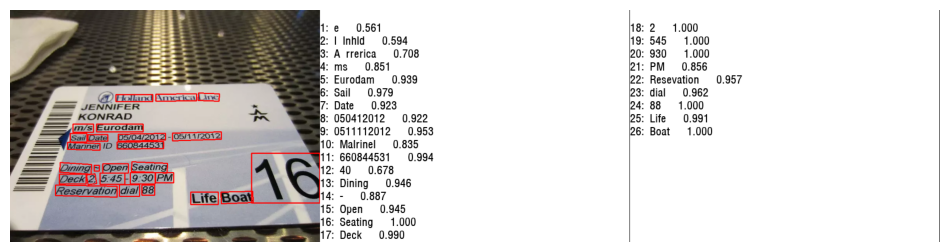

In [16]:
img_path = './image/id-card.png'
result = ocr.ocr(img_path)

font = './image/HMFMMUEX.TTC'

result_ocr(img_path, result, font)

- 손글씨 인식

[2022/09/23 15:43:10] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/09/23 15:43:11] ppocr DEBUG: dt_boxes num : 5, elapse : 0.6643772125244141
[2022/09/23 15:43:12] ppocr DEBUG: rec_res num  : 5, elapse : 0.47924351692199707
[[[[124.0, 164.0], [807.0, 160.0], [808.0, 381.0], [125.0, 384.0]], ('TuNe', 0.6499441862106323)], [[[420.0, 375.0], [540.0, 375.0], [540.0, 541.0], [420.0, 541.0]], ('&', 0.9985443353652954)], [[[138.0, 597.0], [852.0, 603.0], [851.0, 720.0], [137.0, 715.0]], ('SummEk', 0.6112895011901855)], [[[373.0, 771.0], [509.0, 771.0], [509.0, 812.0], [373.0, 812.0]], ('JUNE', 0.7767103314399719)]]


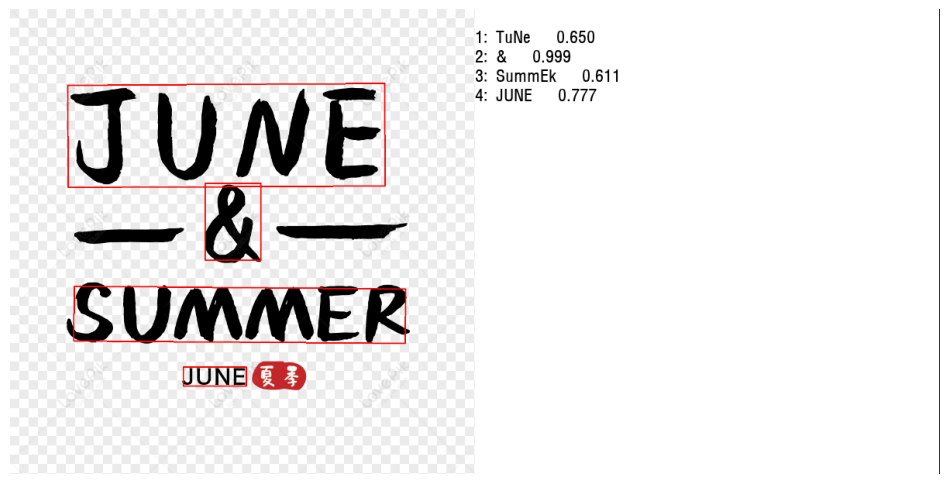

In [17]:
img_path = './image/hand_english.png'
result = ocr.ocr(img_path)

font = './image/HMFMMUEX.TTC'

result_ocr(img_path, result, font)

- 자동차 번호판

[2022/09/23 15:57:21] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/09/23 15:57:21] ppocr DEBUG: dt_boxes num : 1, elapse : 0.15857720375061035
[2022/09/23 15:57:22] ppocr DEBUG: rec_res num  : 1, elapse : 0.10376548767089844
[[[[185.0, 215.0], [246.0, 223.0], [243.0, 245.0], [183.0, 238.0]], ('S899-BFO', 0.9123642444610596)]]


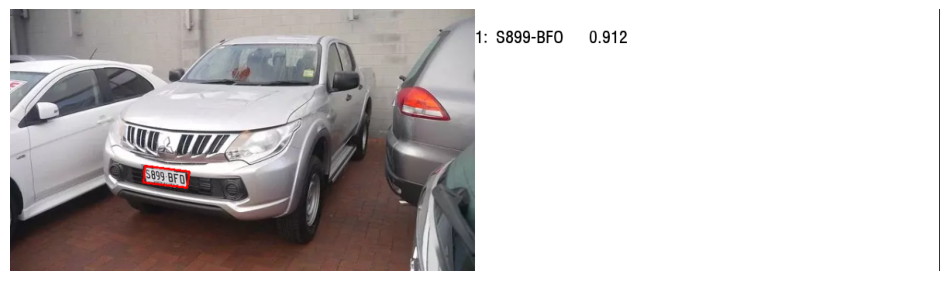

In [24]:
img_path = './image/car_number.png'
result = ocr2.ocr(img_path)

font = './image/HMFMMUEX.TTC'

result_ocr(img_path, result, font)

- 도로 표지판

[2022/09/23 15:57:04] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/09/23 15:57:04] ppocr DEBUG: dt_boxes num : 10, elapse : 0.4414551258087158
[2022/09/23 15:57:05] ppocr DEBUG: rec_res num  : 10, elapse : 1.0354492664337158
[[[[313.0, 286.0], [539.0, 341.0], [527.0, 389.0], [302.0, 334.0]], ('Hollywood', 0.9945341944694519)], [[[584.0, 353.0], [616.0, 363.0], [607.0, 394.0], [575.0, 384.0]], ('B', 0.9962912797927856)], [[[516.0, 375.0], [596.0, 391.0], [590.0, 422.0], [510.0, 406.0]], ('6300', 0.9993444085121155)], [[[633.0, 371.0], [743.0, 416.0], [726.0, 458.0], [616.0, 413.0]], ('LAPD', 0.974770188331604)], [[[632.0, 418.0], [741.0, 466.0], [733.0, 485.0], [624.0, 437.0]], ('TO PROTECTAND SERVE', 0.9234702587127686)], [[[636.0, 488.0], [749.0, 530.0], [741.0, 552.0], [628.0, 510.0]], ('Video Monitoring', 0.9458184242248535)], [[[654.0, 521.0], [734.0, 551.0], [726.0, 573.0], [646.0, 543.0]], ('I

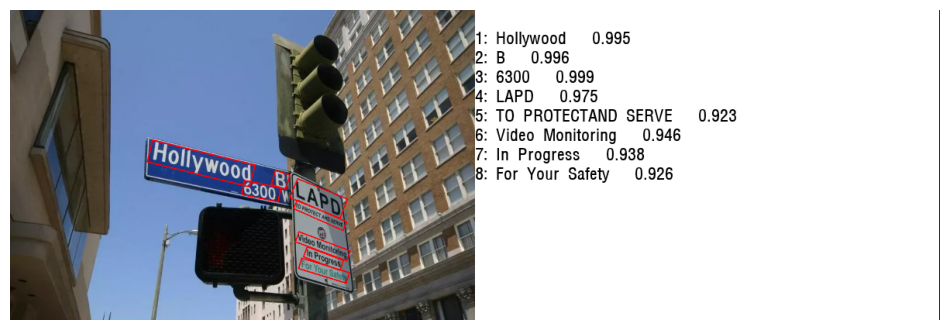

In [22]:
img_path = './image/load_sign.png'
result = ocr2.ocr(img_path)

font = './image/HMFMMUEX.TTC'

result_ocr(img_path, result, font)

- 곡선 텍스트

[2022/09/12 16:50:28] ppocr DEBUG: dt_boxes num : 2, elapse : 0.39397287368774414
[2022/09/12 16:50:28] ppocr DEBUG: cls num  : 2, elapse : 0.020034313201904297
[2022/09/12 16:50:28] ppocr DEBUG: rec_res num  : 2, elapse : 0.18062329292297363


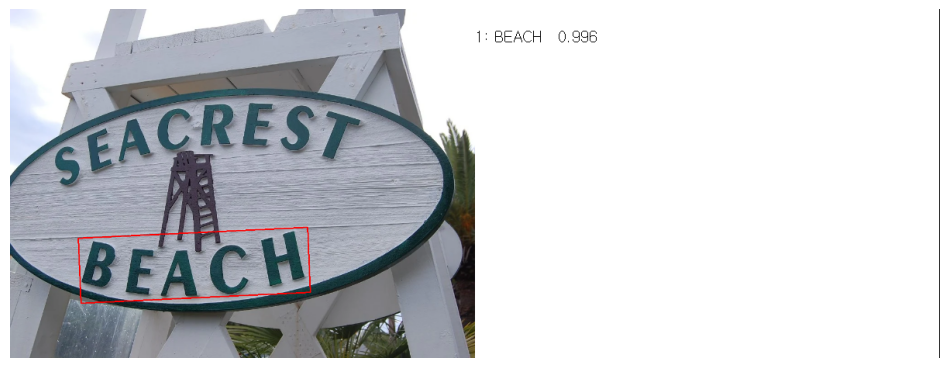

## 구글 OCR API 활용

- 참고 : https://cloud.google.com/vision/docs/quickstart

## Naver 클로버 OCR

- 참고 : https://clova.ai/ocr?lang=ko

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[23차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>○            
        </font></td></tr>   
</table>